In [ ]:
#   Dataset link: "https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir("C:/Users/swarn/Downloads/archive (1)/Training")
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [11]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/swarn/Downloads/archive (1)/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [12]:
X = np.array(X)
Y = np.array(Y)

In [14]:
np.unique(Y)


array([0, 1])

In [15]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [16]:
X.shape

(1222, 200, 200)

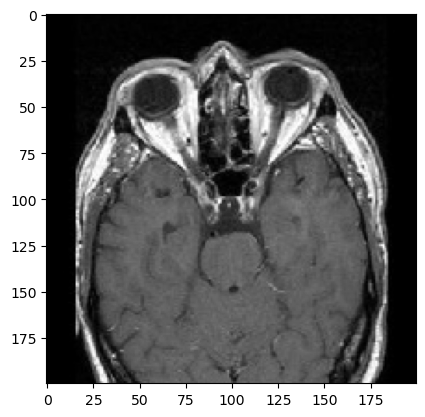

In [17]:
plt.imshow(X[0], cmap='gray')

In [22]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.15)
xtrain.shape, xtest.shape

((1038, 40000), (184, 40000))

In [25]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [26]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [27]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9922928709055877
Testing Score: 0.9782608695652174


In [31]:
pred = sv.predict(xtest)
np.where(ytest!=pred)
pred[36]

0

In [32]:
ytest[36]

1

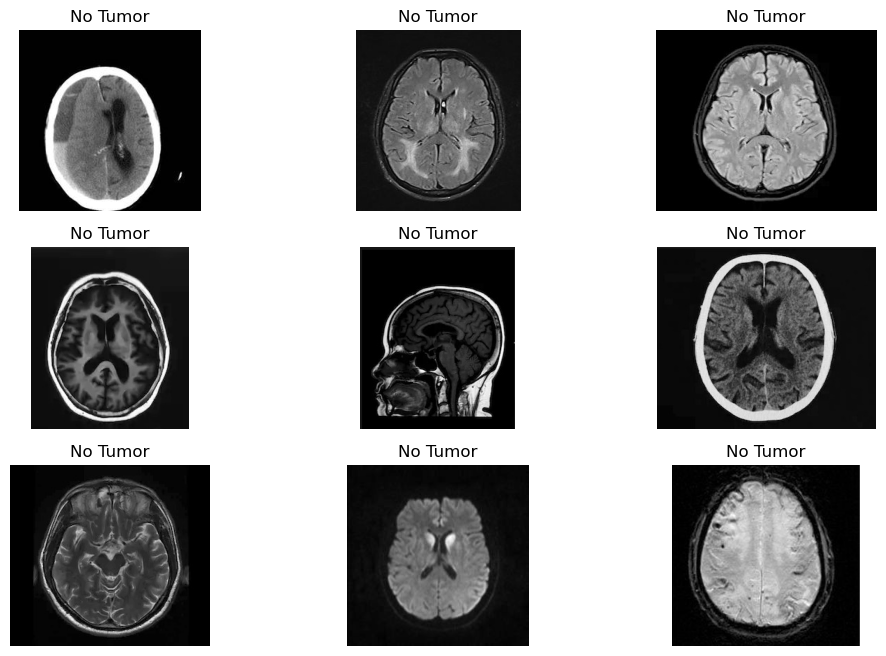

In [38]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/swarn/Downloads/archive (1)/Testing/no_tumor/')
c=1
for i in os.listdir('C:/Users/swarn/Downloads/archive (1)/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/swarn/Downloads/archive (1)/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

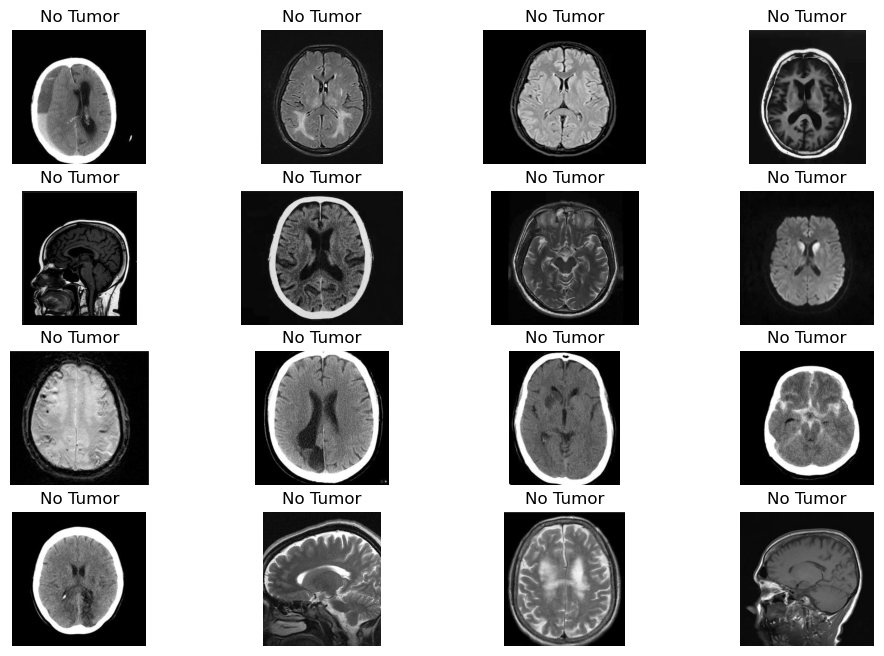

In [39]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/swarn/Downloads/archive (1)/Testing/no_tumor/')
c=1
for i in os.listdir('C:/Users/swarn/Downloads/archive (1)/Testing/no_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/swarn/Downloads/archive (1)/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1